In [1]:
#Libraries import for data preparation
import pandas as pd
import numpy as np
#Libraries import for data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for Statistics 

from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
#Libriries for path
import os

#Libraries for MAchine Learnig 
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics   
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Creating Resources path to import and read datasets 
df_1 = pd.read_csv("Acc_NP.csv")
df_2 = pd.read_csv("Acc_RJ.csv")
df_3 = pd.read_csv("Acc_E.csv")

## 1.1  EDA Dataset 1

In [3]:
#Showing first 5 rows of dataset
df_1.head()

,STATISTIC,Statistic,TLIST(M1),Month,UNIT,Hotel/conference centre,Guest house/bed & breakfast,Friends/relatives/own property,Self catering/rented house,Other private tourism accommodation n.e.c.,All types of accommodation
0,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M04,2023 April,Thousand,181.8,15.4,220.3,26.3,18.1,461.9
1,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M05,2023 May,Thousand,234.0,25.6,241.7,31.2,40.8,573.3
2,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M06,2023 June,Thousand,286.2,24.8,231.7,34.9,42.3,619.9
3,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M07,2023 July,Thousand,276.3,26.7,260.4,41.2,45.6,650.2
4,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M08,2023 August,Thousand,297.0,45.7,295.9,36.6,62.3,737.6


In [4]:
#Showing last 5 rows of dataset
df_1.tail(10)

,STATISTIC,Statistic,TLIST(M1),Month,UNIT,Hotel/conference centre,Guest house/bed & breakfast,Friends/relatives/own property,Self catering/rented house,Other private tourism accommodation n.e.c.,All types of accommodation
40,ITM05C05,Average Length of Stay of Foreign Visitors,2023M04,2023 April,Nights per trip,4.4,5.8,8.6,14.7,26.7,7.9
41,ITM05C05,Average Length of Stay of Foreign Visitors,2023M05,2023 May,Nights per trip,4.9,6.7,7.0,11.6,26.7,7.8
42,ITM05C05,Average Length of Stay of Foreign Visitors,2023M06,2023 June,Nights per trip,5.2,9.5,8.4,9.4,12.2,7.3
43,ITM05C05,Average Length of Stay of Foreign Visitors,2023M07,2023 July,Nights per trip,5.3,8.3,10.2,11.6,18.2,8.7
44,ITM05C05,Average Length of Stay of Foreign Visitors,2023M08,2023 August,Nights per trip,5.7,10.3,12.7,11.9,15.6,9.9
45,ITM05C05,Average Length of Stay of Foreign Visitors,2023M09,2023 September,Nights per trip,5.5,8.1,10.0,11.9,13.3,8.0
46,ITM05C05,Average Length of Stay of Foreign Visitors,2023M10,2023 October,Nights per trip,4.9,6.6,8.0,10.3,12.0,6.9
47,ITM05C05,Average Length of Stay of Foreign Visitors,2023M11,2023 November,Nights per trip,3.9,5.4,8.4,14.1,17.2,6.9
48,ITM05C05,Average Length of Stay of Foreign Visitors,2023M12,2023 December,Nights per trip,4.0,6.3,7.3,22.7,56.0,10.1
49,ITM05C05,Average Length of Stay of Foreign Visitors,2024M01,2024 January,Nights per trip,3.5,5.4,10.9,16.7,15.0,8.4


In [5]:
#this data set contains 50 observations and 11 features
df_1.shape

(50, 11)

In [6]:
#Now we're showing the types of the feautures looking for any inconsistent this dataset
df_1.dtypes

STATISTIC                                      object
Statistic                                      object
TLIST(M1)                                      object
Month                                          object
UNIT                                           object
Hotel/conference centre                       float64
Guest house/bed & breakfast                   float64
Friends/relatives/own property                float64
Self catering/rented house                    float64
Other private tourism accommodation n.e.c.    float64
All types of accommodation                    float64
dtype: object

In [7]:
#Splitting the feature Month in Year and Moth 
df_1[['Year', 'Month']] = df_1['Month'].str.split(' ', expand=True)
df_1.head()

,STATISTIC,Statistic,TLIST(M1),Month,UNIT,Hotel/conference centre,Guest house/bed & breakfast,Friends/relatives/own property,Self catering/rented house,Other private tourism accommodation n.e.c.,All types of accommodation,Year
0,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M04,April,Thousand,181.8,15.4,220.3,26.3,18.1,461.9,2023
1,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M05,May,Thousand,234.0,25.6,241.7,31.2,40.8,573.3,2023
2,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M06,June,Thousand,286.2,24.8,231.7,34.9,42.3,619.9,2023
3,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M07,July,Thousand,276.3,26.7,260.4,41.2,45.6,650.2,2023
4,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M08,August,Thousand,297.0,45.7,295.9,36.6,62.3,737.6,2023


In [8]:
#Changing type of Year from object to INT because the observations are numeric
df_1["Year"] = pd.to_numeric(df_1["Year"])
df_1.dtypes

STATISTIC                                      object
Statistic                                      object
TLIST(M1)                                      object
Month                                          object
UNIT                                           object
Hotel/conference centre                       float64
Guest house/bed & breakfast                   float64
Friends/relatives/own property                float64
Self catering/rented house                    float64
Other private tourism accommodation n.e.c.    float64
All types of accommodation                    float64
Year                                            int64
dtype: object

In [9]:
#Renaming features by removing spaces between words and making labels short.  
r_ColName = {
    'Hotel/conference centre': 'Hotel',
    'Guest house/bed & breakfast': 'Guest_House/B&B',
    'Friends/relatives/own property': 'Friends/relatives',
    'Self catering/rented house': 'Rented_House',
    'Other private tourism accommodation n.e.c.': 'Other',
    'All types of accommodation': 'All_Types'
}
df_1.rename(columns= r_ColName, inplace =True) 
df_1.head()


,STATISTIC,Statistic,TLIST(M1),Month,UNIT,Hotel,Guest_House/B&B,Friends/relatives,Rented_House,Other,All_Types,Year
0,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M04,April,Thousand,181.8,15.4,220.3,26.3,18.1,461.9,2023
1,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M05,May,Thousand,234.0,25.6,241.7,31.2,40.8,573.3,2023
2,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M06,June,Thousand,286.2,24.8,231.7,34.9,42.3,619.9,2023
3,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M07,July,Thousand,276.3,26.7,260.4,41.2,45.6,650.2,2023
4,ITM05C01,Number of Overnight Trips by Foreign Visitors,2023M08,August,Thousand,297.0,45.7,295.9,36.6,62.3,737.6,2023


In [10]:
#Looking for duplicated rows,there is none duplicate rows 
duplicate_rows_df = df_1[df_1.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 12)


In [11]:
#Counting the observations by features 
df_1.count()

STATISTIC            50
Statistic            50
TLIST(M1)            50
Month                50
UNIT                 50
Hotel                50
Guest_House/B&B      50
Friends/relatives    50
Rented_House         50
Other                50
All_Types            50
Year                 50
dtype: int64

In [12]:
#cheking if there is any null value in the dataset
print(df_1.isnull().sum()) 

STATISTIC            0
Statistic            0
TLIST(M1)            0
Month                0
UNIT                 0
Hotel                0
Guest_House/B&B      0
Friends/relatives    0
Rented_House         0
Other                0
All_Types            0
Year                 0
dtype: int64


In [13]:
#Let's check Statistics feauture to find any data that isn't relevant for our porpouse
df_1["Statistic"].unique()

array(['Number of Overnight Trips by Foreign Visitors',
       'Percentage of Overnight Trips by Foreign Visitors',
       'Number of Nights by Foreign Visitors',
       'Percentage of Nights by Foreign Visitors',
       'Average Length of Stay of Foreign Visitors'], dtype=object)

In [14]:
#Now we'll drop all the observations that contains Porcentange and averange because is not relevant  
df_1 = df_1[~(df_1['Statistic'].str.contains('Percentage of Overnight Trips by Foreign Visitors') | 
              df_1['Statistic'].str.contains('Percentage of Nights by Foreign Visitors')| 
              df_1['Statistic'].str.contains('Average Length of Stay of Foreign Visitors'))]

In [15]:
#Cheking the shape after clean up the dataset
df_1.shape

(20, 12)

In [16]:
#Now we'll drop irrelevant features 
df_1 = df_1.drop(["STATISTIC", "TLIST(M1)", "UNIT"], axis=1)
df_1.head(5)

,Statistic,Month,Hotel,Guest_House/B&B,Friends/relatives,Rented_House,Other,All_Types,Year
0,Number of Overnight Trips by Foreign Visitors,April,181.8,15.4,220.3,26.3,18.1,461.9,2023
1,Number of Overnight Trips by Foreign Visitors,May,234.0,25.6,241.7,31.2,40.8,573.3,2023
2,Number of Overnight Trips by Foreign Visitors,June,286.2,24.8,231.7,34.9,42.3,619.9,2023
3,Number of Overnight Trips by Foreign Visitors,July,276.3,26.7,260.4,41.2,45.6,650.2,2023
4,Number of Overnight Trips by Foreign Visitors,August,297.0,45.7,295.9,36.6,62.3,737.6,2023


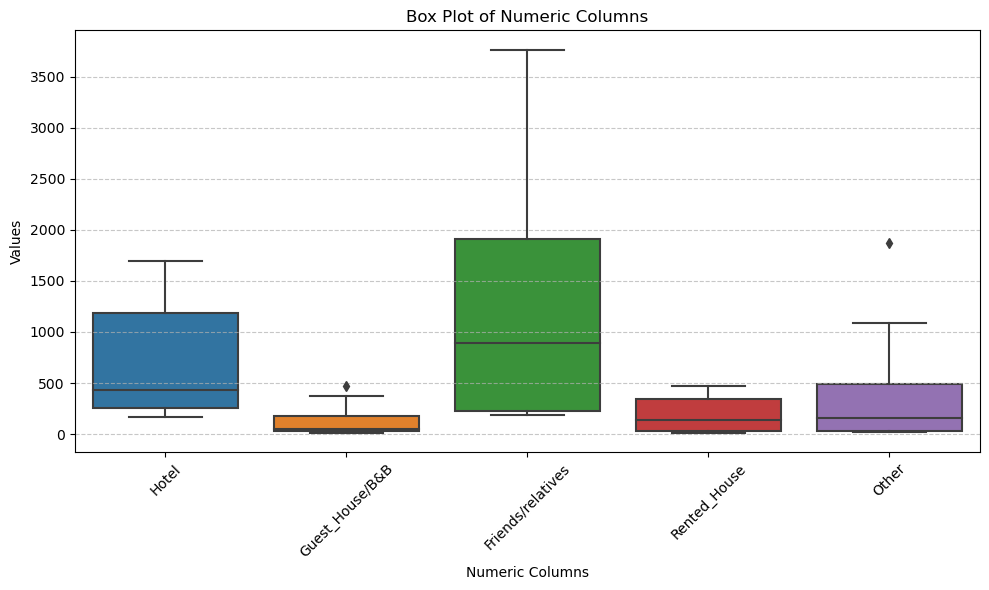

In [17]:
#Detecting if there are any ouliaers in our features
num_columns = ['Hotel', 'Guest_House/B&B', 'Friends/relatives', 'Rented_House', 'Other']
#Plotting Box plot Graph
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_1[num_columns])
plt.title('Box Plot of Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#sns.boxplot(x=df_1['Hotel'], color='Blue', linewidth=0.5) 

In [18]:
## How we can see, just Guest and other features has outliaer 

In [19]:
#Applying IQR to our dataset
quantiles = df_1[['Hotel','Guest_House/B&B', 'Friends/relatives','Rented_House','Other', 'All_Types']]
Q1 = quantiles.quantile(0.25)
Q3 = quantiles.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Hotel                 927.875
Guest_House/B&B       152.875
Friends/relatives    1684.400
Rented_House          310.350
Other                 459.125
All_Types            3906.775
dtype: float64


In [20]:
#dropping outliers
df_1 = df_1[~((quantiles < (Q1-1.5 * IQR)) |(quantiles > (Q3 + 1.5 * IQR))).any(axis=1)]
df_1.shape 

(18, 9)

In [21]:
# creating a new dataset with our relevant information 
data = df_1[['Year','Month','Hotel', 'Guest_House/B&B','Friends/relatives','Rented_House', 'Other']]
data = data.groupby(['Year', 'Month']).sum()
#in the last step we grouping our information by month/year in order to proceed to visualize it. 

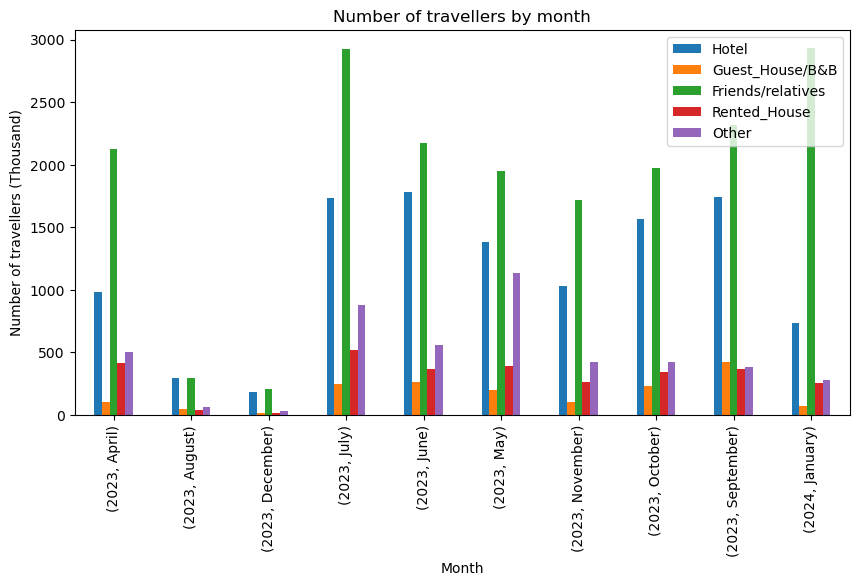

In [22]:
data.plot(kind='bar', figsize=(10,5)) 
plt.title("Number of travellers by month") 
plt.ylabel('Number of travellers (Thousand)') 
plt.xlabel('Month'); 
plt.legend(loc='upper right')

In the previous graph we can visualize how the months of Abril, July, and September are the months in which more tourists entered Ireland.  

<Axes: >

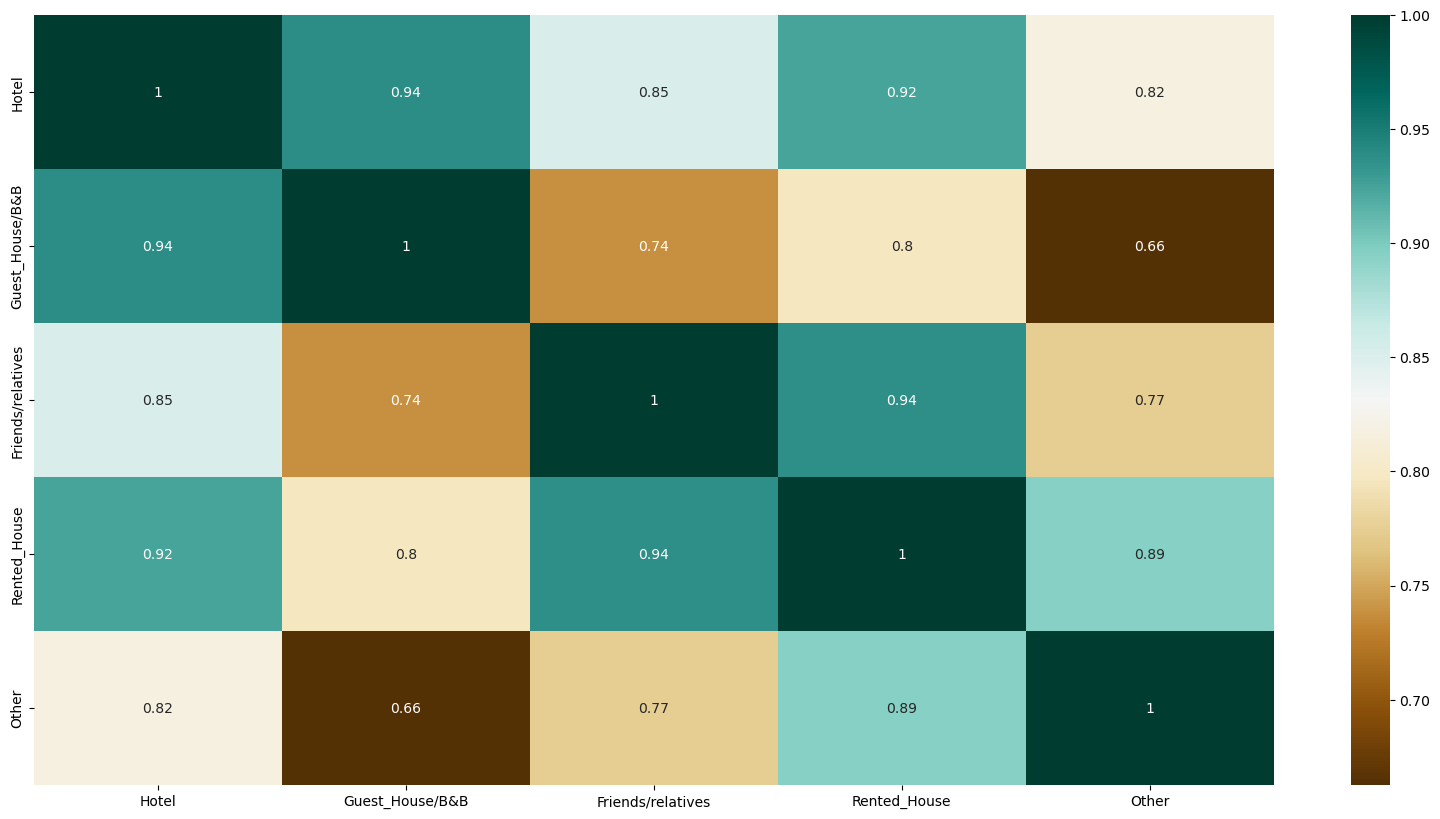

In [23]:
#Now we'll check the correlation between our features 
quantiles = df_1[['Hotel','Guest_House/B&B', 'Friends/relatives','Rented_House','Other']]

plt.figure(figsize=(20,10)) 
c= quantiles.corr() 
sns.heatmap(c,cmap="BrBG",annot=True) 

In the correlation graph we can see that the features Guest_HouseB&B - Hotel, Hotel - Rented_House and Friends/relatives -Rented_House are highly correlated, which implies that there is a tendency between them.

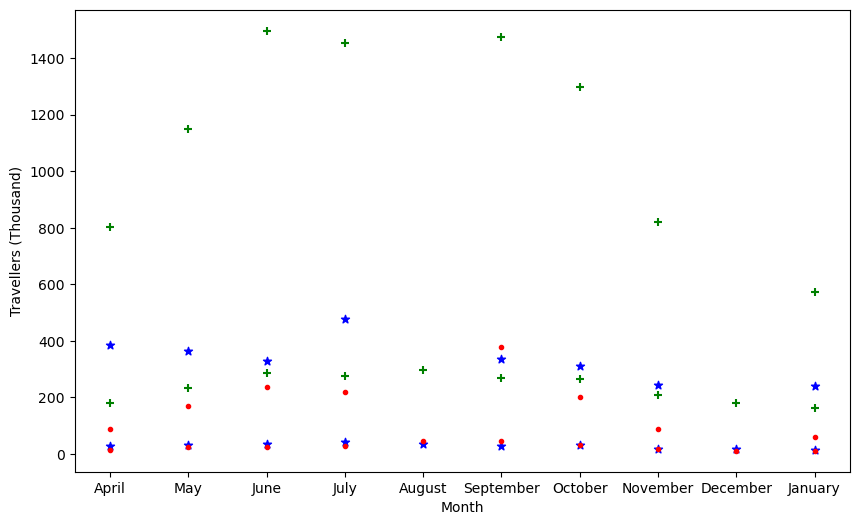

In [24]:

fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(df_1['Month'], df_1['Rented_House'], color = 'blue', marker='*') 
ax.scatter(df_1['Month'], df_1['Hotel'], color = 'green', marker='+')
ax.scatter(df_1['Month'], df_1['Guest_House/B&B'], color = 'red', marker='.')
ax.set_xlabel('Month') 
ax.set_ylabel('Travellers (Thousand)') 
plt.show() 


In [25]:
#Now with the scatter plot we can see how our features are correlated by month 

## 1.2  EDA Dataset 2

In [26]:
#Accomodation for Reason of Journey by Year 2009 -2019, showing 5 firt rows of data set
df_2.head()

,Statistic,Reason for Journey,Year,UNIT,All types of accommodation,Hotels,Rented house/apartment,Friends/relatives,Guest house/bed &breakfast,Other
0,Number of Bednights Spent in Ireland by Non-re...,All reasons for journey,2009,Thousand,52823,11187,9422,18177,4484,9553
1,Number of Bednights Spent in Ireland by Non-re...,All reasons for journey,2010,Thousand,47971,11265,8346,15110,3989,9261
2,Number of Bednights Spent in Ireland by Non-re...,All reasons for journey,2011,Thousand,50323,12552,8494,14785,4169,10324
3,Number of Bednights Spent in Ireland by Non-re...,All reasons for journey,2012,Thousand,47942,14180,6048,13331,4074,10311
4,Number of Bednights Spent in Ireland by Non-re...,All reasons for journey,2013,Thousand,50985,14272,6935,14336,4451,10992


In [27]:
#Displaying botton 5 rows of dataset 
df_2.tail()

,Statistic,Reason for Journey,Year,UNIT,All types of accommodation,Hotels,Rented house/apartment,Friends/relatives,Guest house/bed &breakfast,Other
50,Number of Bednights Spent in Ireland by Non-re...,Other reason for journey,2015,Thousand,10776,433,4538,764,1021,4020
51,Number of Bednights Spent in Ireland by Non-re...,Other reason for journey,2016,Thousand,11062,528,4792,764,1003,3975
52,Number of Bednights Spent in Ireland by Non-re...,Other reason for journey,2017,Thousand,11101,465,4897,854,1010,3874
53,Number of Bednights Spent in Ireland by Non-re...,Other reason for journey,2018,Thousand,10460,540,4688,680,958,3595
54,Number of Bednights Spent in Ireland by Non-re...,Other reason for journey,2019,Thousand,10713,598,4582,716,1068,3749


Now we will chek wich features irrelevants we can drop fron our dataset

In [28]:
df_2['UNIT'].unique()

array(['Thousand'], dtype=object)

In [29]:
df_2['Statistic'].unique()

array(['Number of Bednights Spent in Ireland by Non-residents on Overseas Trips'],
      dtype=object)

According the information that those features contains we can say that tey are not relevant for our porpouses so in order to continue our EDA we proceed to drop those features


In [30]:
#Droping features Staticits and unit from dataset 
df_2 = df_2.drop(["Statistic", "UNIT" ], axis=1)
df_2.head(5)

,Reason for Journey,Year,All types of accommodation,Hotels,Rented house/apartment,Friends/relatives,Guest house/bed &breakfast,Other
0,All reasons for journey,2009,52823,11187,9422,18177,4484,9553
1,All reasons for journey,2010,47971,11265,8346,15110,3989,9261
2,All reasons for journey,2011,50323,12552,8494,14785,4169,10324
3,All reasons for journey,2012,47942,14180,6048,13331,4074,10311
4,All reasons for journey,2013,50985,14272,6935,14336,4451,10992


In [31]:
#Checking the types of our features and looking for any type of data inconsistent that can affect us later 
df_2.dtypes

Reason for Journey            object
Year                           int64
All types of accommodation     int64
Hotels                         int64
Rented house/apartment         int64
Friends/relatives              int64
Guest house/bed &breakfast     int64
Other                          int64
dtype: object

In [32]:
#changing the names of features with spaces between words to avoid problem in next steps  
r_ColName = {
    'Reason for Journey': 'Reason_Journey',
    'Rented house/apartment': 'Rented_House/Apartment',
    'Guest house/bed &breakfast' :'Guess/B&B'
}
df_2.rename(columns= r_ColName, inplace= True)

In [33]:
#Displaying our dataset after drop and rename features 
df_2.head(5)

,Reason_Journey,Year,All types of accommodation,Hotels,Rented_House/Apartment,Friends/relatives,Guess/B&B,Other
0,All reasons for journey,2009,52823,11187,9422,18177,4484,9553
1,All reasons for journey,2010,47971,11265,8346,15110,3989,9261
2,All reasons for journey,2011,50323,12552,8494,14785,4169,10324
3,All reasons for journey,2012,47942,14180,6048,13331,4074,10311
4,All reasons for journey,2013,50985,14272,6935,14336,4451,10992


In [34]:
#displaying the shape of our dataset
df_2.shape

(55, 8)

In [35]:
#Let's check if there is any duplicated row
duplicate_rows_df = df_2[df_2.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


In [36]:
#Counting observatios by features 
df_2.count() 

Reason_Journey                55
Year                          55
All types of accommodation    55
Hotels                        55
Rented_House/Apartment        55
Friends/relatives             55
Guess/B&B                     55
Other                         55
dtype: int64

In [37]:
#Now we'll check if there is any null value in our dataset, the method is null return the null values 
#and with sum() method we sum the observations that contais null values 
print(df_2.isnull().sum())

Reason_Journey                0
Year                          0
All types of accommodation    0
Hotels                        0
Rented_House/Apartment        0
Friends/relatives             0
Guess/B&B                     0
Other                         0
dtype: int64


After review our dataset we can sey that there is none duplicate and null value 

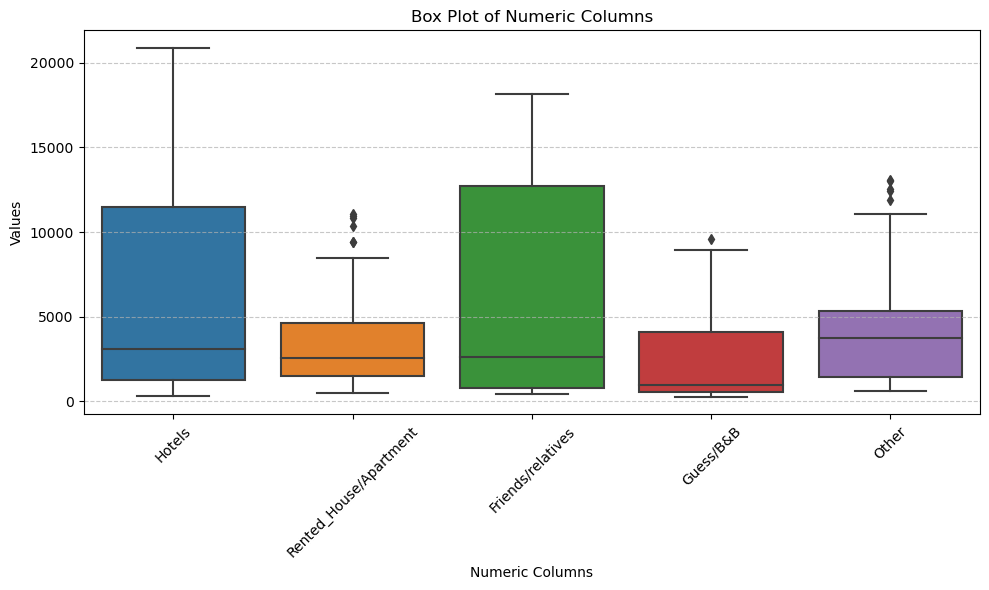

In [38]:
#Now we'll plot the numeric features to find any outliers that can have in our dataset 
num_columns = ['Hotels', 'Rented_House/Apartment', 'Friends/relatives', 'Guess/B&B', 'Other']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2[num_columns])
plt.title('Box Plot of Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


After displaying our numerical data in the boxplot we can see that 3 of our 5 characteristics contain outliers so in order to optimize our data we proceed to apply IQR

In [39]:
quantiles = df_2[['Hotels', 'Rented_House/Apartment','Friends/relatives','Guess/B&B','Other']]
Q1 = quantiles.quantile(0.25)
Q3 = quantiles.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Hotels                    10209.5
Rented_House/Apartment     3124.5
Friends/relatives         11954.0
Guess/B&B                  3577.5
Other                      3906.5
dtype: float64


In [40]:
#dropping outliers
df_2 = df_2[~((quantiles < (Q1-1.5 * IQR)) |(quantiles > (Q3 + 1.5 * IQR))).any(axis=1)]
df_2.shape 

(49, 8)

In [41]:
#Diplaying dataset after cleanning 
df_2.head()

,Reason_Journey,Year,All types of accommodation,Hotels,Rented_House/Apartment,Friends/relatives,Guess/B&B,Other
1,All reasons for journey,2010,47971,11265,8346,15110,3989,9261
2,All reasons for journey,2011,50323,12552,8494,14785,4169,10324
3,All reasons for journey,2012,47942,14180,6048,13331,4074,10311
4,All reasons for journey,2013,50985,14272,6935,14336,4451,10992
5,All reasons for journey,2014,54877,14707,7852,16096,5171,11051


In [42]:
#Now we'll splitl the numerical faetures and Reason of journey to display in a bar graph, 
num_colum= ['Hotels', 'Rented_House/Apartment','Friends/relatives','Guess/B&B','Other']
data= df_2.groupby(["Reason_Journey"])[num_colum].sum()
data


,Hotels,Rented_House/Apartment,Friends/relatives,Guess/B&B,Other
Reason_Journey,,,,,
All reasons for journey,66976,37675,73658,21854,51939
Business,34734,20482,8137,4767,11456
Holiday/leisure/recreation,116373,25876,28140,46543,49976
Other reason for journey,5536,43202,8434,9153,43902
Visit to friends/relatives,17549,10221,131321,7557,19140


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'All reasons for journey'),
  Text(1, 0, 'Business'),
  Text(2, 0, 'Holiday/leisure/recreation'),
  Text(3, 0, 'Other reason for journey'),
  Text(4, 0, 'Visit to friends/relatives')])

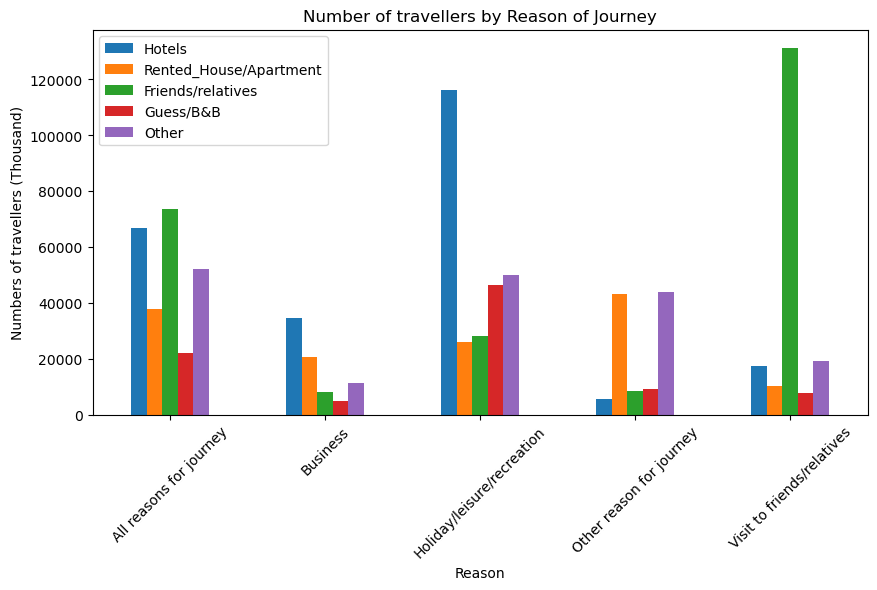

In [43]:
data.plot(kind="bar", figsize=(10,5))
plt.title("Number of travellers by Reason of Journey")
plt.ylabel("Numbers of travellers (Thousand)")
plt.xlabel("Reason");
plt.xticks(rotation=45)

The graph above shows the amount of usage for all types of accommodations and how they relate to the purpose of the trip. 

<Axes: >

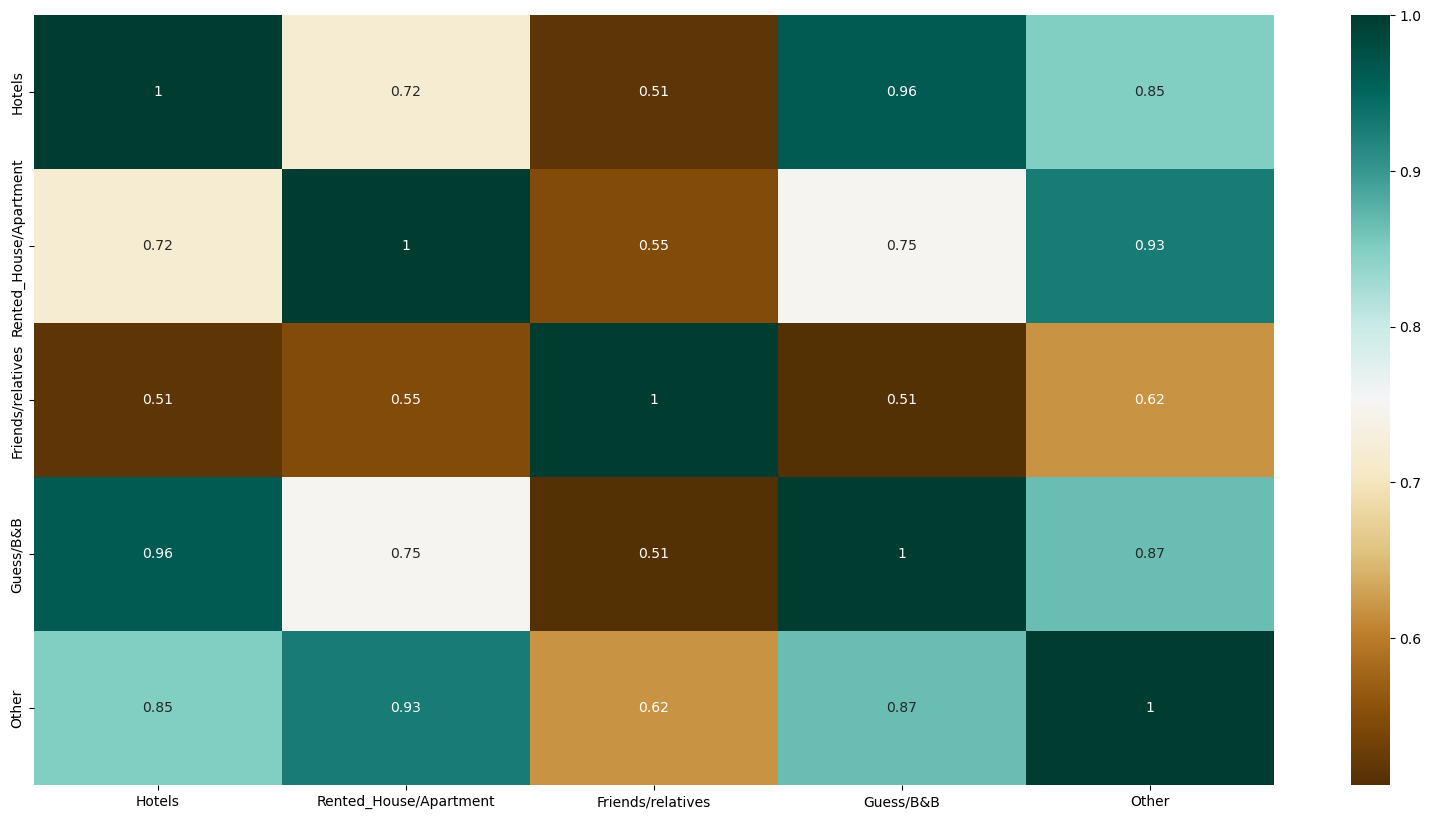

In [44]:
#Now we'll check the correlation between our features
plt.figure(figsize=(20,10)) 
c= quantiles.corr() 
sns.heatmap(c,cmap="BrBG",annot=True) 

In the correlation graph we can see that the features Guest_HouseB&B - Hotel, Rented_House - other and Other - Rented_House are highly correlated, which implies that there is a tendency between them.

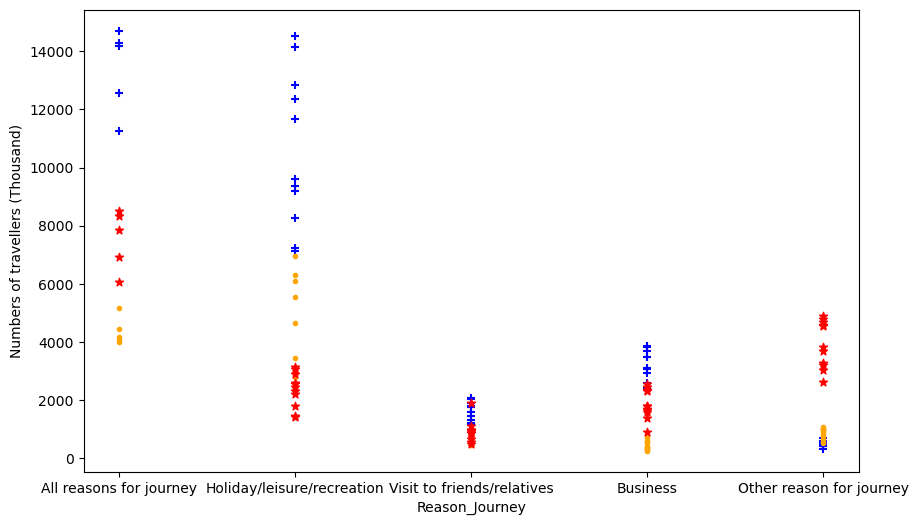

In [45]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(df_2['Reason_Journey'], df_2['Hotels'], color= 'Blue', marker = '+') 
ax.scatter(df_2['Reason_Journey'], df_2['Guess/B&B'], color = 'orange', marker = '.')
ax.scatter(df_2['Reason_Journey'], df_2['Rented_House/Apartment'], color = 'red', marker = '*')
ax.set_xlabel('Reason_Journey') 
ax.set_ylabel('Numbers of travellers (Thousand)') 
plt.show() 

Now with the scatter plot we can see how our features are correlated by Reason of Journey 

## 1.3  EDA Dataset 3

In [46]:
df_3.head()

,Statistic,Month,Residency,UNIT,Fare,Prepayments,Accommodation,Day-to-Day Expenditure,All Travel Expenditure
0,Expenditure of Overnight Foreign Visitors,2023 April,"Great Britain (England, Scotland & Wales)",Euro Million,28.3,1.9,27.9,57.8,116.0
1,Expenditure of Overnight Foreign Visitors,2023 April,Other Europe (3),Euro Million,30.7,3.3,56.7,72.9,163.6
2,Expenditure of Overnight Foreign Visitors,2023 April,USA & Canada,Euro Million,55.8,5.7,51.8,65.6,178.9
3,Expenditure of Overnight Foreign Visitors,2023 April,Other Residencies,Euro Million,8.2,1.1,9.9,16.0,35.2
4,Expenditure of Overnight Foreign Visitors,2023 April,All Residencies,Euro Million,123.1,12.1,146.3,212.3,493.8


In [47]:
df_3.tail()

,Statistic,Month,Residency,UNIT,Fare,Prepayments,Accommodation,Day-to-Day Expenditure,All Travel Expenditure
50,Expenditure of Overnight Foreign Visitors,2024 February,"Great Britain (England, Scotland & Wales)",Euro Million,26.0,3.0,36.2,48.6,113.8
51,Expenditure of Overnight Foreign Visitors,2024 February,Other Europe (3),Euro Million,25.2,2.0,41.7,60.0,128.9
52,Expenditure of Overnight Foreign Visitors,2024 February,USA & Canada,Euro Million,28.8,2.4,23.6,32.1,86.9
53,Expenditure of Overnight Foreign Visitors,2024 February,Other Residencies,Euro Million,10.6,0.4,12.9,20.9,44.8
54,Expenditure of Overnight Foreign Visitors,2024 February,All Residencies,Euro Million,90.7,7.8,114.3,161.6,374.4


In [48]:
df_3.dtypes

Statistic                  object
Month                      object
Residency                  object
UNIT                       object
Fare                      float64
Prepayments               float64
Accommodation             float64
Day-to-Day Expenditure    float64
All Travel Expenditure    float64
dtype: object

In [49]:
df_3[['Year', 'Month']] = df_3['Month'].str.split(' ', expand=True)
df_3.head()

,Statistic,Month,Residency,UNIT,Fare,Prepayments,Accommodation,Day-to-Day Expenditure,All Travel Expenditure,Year
0,Expenditure of Overnight Foreign Visitors,April,"Great Britain (England, Scotland & Wales)",Euro Million,28.3,1.9,27.9,57.8,116.0,2023
1,Expenditure of Overnight Foreign Visitors,April,Other Europe (3),Euro Million,30.7,3.3,56.7,72.9,163.6,2023
2,Expenditure of Overnight Foreign Visitors,April,USA & Canada,Euro Million,55.8,5.7,51.8,65.6,178.9,2023
3,Expenditure of Overnight Foreign Visitors,April,Other Residencies,Euro Million,8.2,1.1,9.9,16.0,35.2,2023
4,Expenditure of Overnight Foreign Visitors,April,All Residencies,Euro Million,123.1,12.1,146.3,212.3,493.8,2023


In [50]:
df_3['Statistic'].unique()

array(['Expenditure of Overnight Foreign Visitors'], dtype=object)

In [51]:
df_3 = df_3.drop(['Statistic','UNIT', 'All Travel Expenditure'], axis=1) 
df_3.head(5)

,Month,Residency,Fare,Prepayments,Accommodation,Day-to-Day Expenditure,Year
0,April,"Great Britain (England, Scotland & Wales)",28.3,1.9,27.9,57.8,2023
1,April,Other Europe (3),30.7,3.3,56.7,72.9,2023
2,April,USA & Canada,55.8,5.7,51.8,65.6,2023
3,April,Other Residencies,8.2,1.1,9.9,16.0,2023
4,April,All Residencies,123.1,12.1,146.3,212.3,2023


In [52]:
r_ColName = {
    'Day-to-Day Expenditure': 'DD_Expenditure'
}
df_3.rename(columns= r_ColName, inplace =True) 
df_3.head()

,Month,Residency,Fare,Prepayments,Accommodation,DD_Expenditure,Year
0,April,"Great Britain (England, Scotland & Wales)",28.3,1.9,27.9,57.8,2023
1,April,Other Europe (3),30.7,3.3,56.7,72.9,2023
2,April,USA & Canada,55.8,5.7,51.8,65.6,2023
3,April,Other Residencies,8.2,1.1,9.9,16.0,2023
4,April,All Residencies,123.1,12.1,146.3,212.3,2023


In [53]:
df_3.shape

(55, 7)

In [54]:
dr_df = df_3[df_3.duplicated()] 
print("number of duplicate rows: ", dr_df.shape)

number of duplicate rows:  (0, 7)


In [55]:
df_3.count() 

Month             55
Residency         55
Fare              55
Prepayments       55
Accommodation     55
DD_Expenditure    55
Year              55
dtype: int64

In [56]:
print(df_3.isnull().sum()) 

Month             0
Residency         0
Fare              0
Prepayments       0
Accommodation     0
DD_Expenditure    0
Year              0
dtype: int64


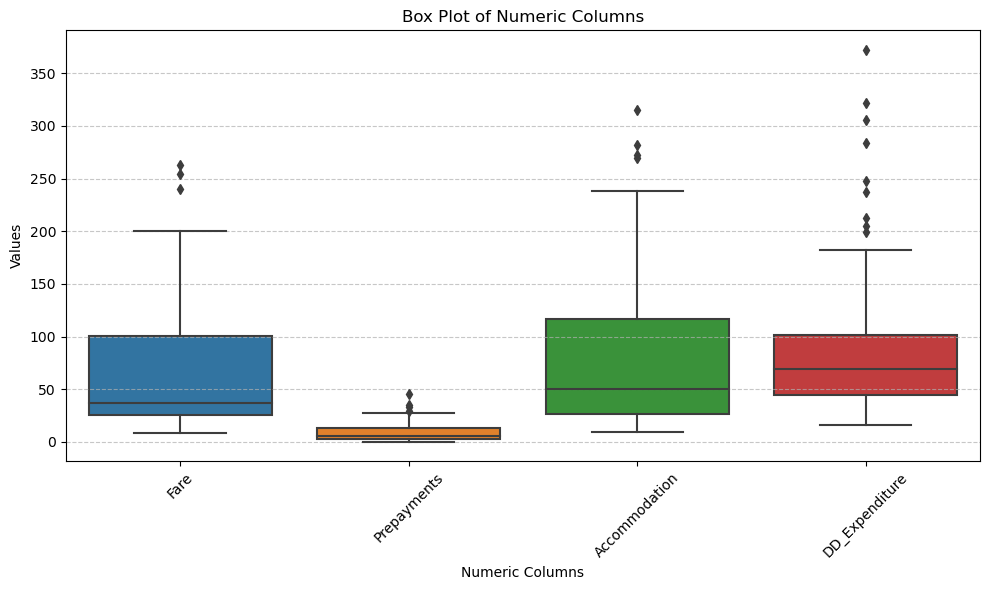

In [57]:
num_columns = ['Fare', 'Prepayments', 'Accommodation', 'DD_Expenditure']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_3[num_columns])
plt.title('Box Plot of Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#sns.boxplot(x=df_3['Accommodation']) 

In [58]:
Q1 = df_3[['Fare', 'Prepayments','Accommodation','DD_Expenditure']].quantile(0.25)
Q3 = df_3[['Fare', 'Prepayments','Accommodation','DD_Expenditure']].quantile(0.75)
IQR = Q3-Q1
print(IQR)

Fare              74.80
Prepayments       10.95
Accommodation     89.85
DD_Expenditure    57.10
dtype: float64


In [59]:
quantiles = df_3[['Fare', 'Prepayments','Accommodation','DD_Expenditure']]

In [60]:
df_3 = df_3[~((quantiles < (Q1-1.5 * IQR)) |(quantiles > (Q3 + 1.5 * IQR))).any(axis=1)]
df_3.shape 

(46, 7)

In [61]:
df_3.head()

,Month,Residency,Fare,Prepayments,Accommodation,DD_Expenditure,Year
0,April,"Great Britain (England, Scotland & Wales)",28.3,1.9,27.9,57.8,2023
1,April,Other Europe (3),30.7,3.3,56.7,72.9,2023
2,April,USA & Canada,55.8,5.7,51.8,65.6,2023
3,April,Other Residencies,8.2,1.1,9.9,16.0,2023
5,May,"Great Britain (England, Scotland & Wales)",28.8,3.2,35.5,56.5,2023


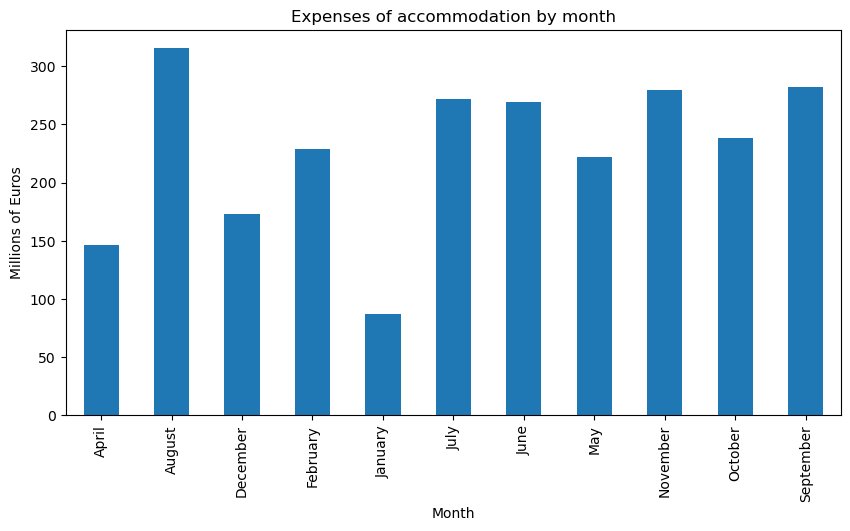

In [62]:
df_3.groupby("Month")["Accommodation"].sum().plot(kind='bar', figsize=(10,5)) 
plt.title("Expenses of accommodation by month") 
plt.ylabel('Millions of Euros') 
plt.xlabel('Month'); 

<Axes: >

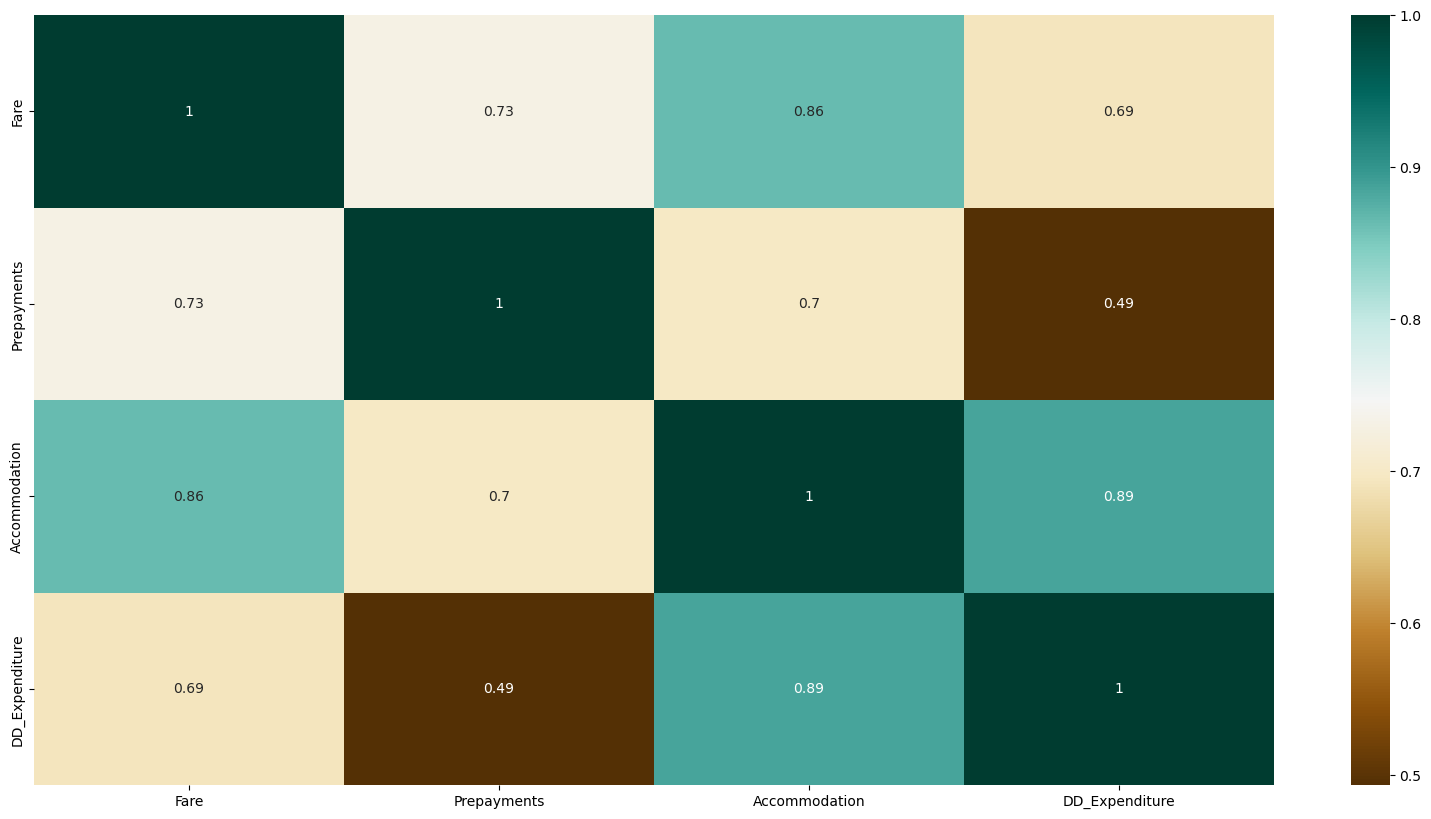

In [63]:
quantiles = df_3[['Fare', 'Prepayments','Accommodation','DD_Expenditure']]
plt.figure(figsize=(20,10)) 
c= quantiles.corr() 
sns.heatmap(c,cmap="BrBG",annot=True) 

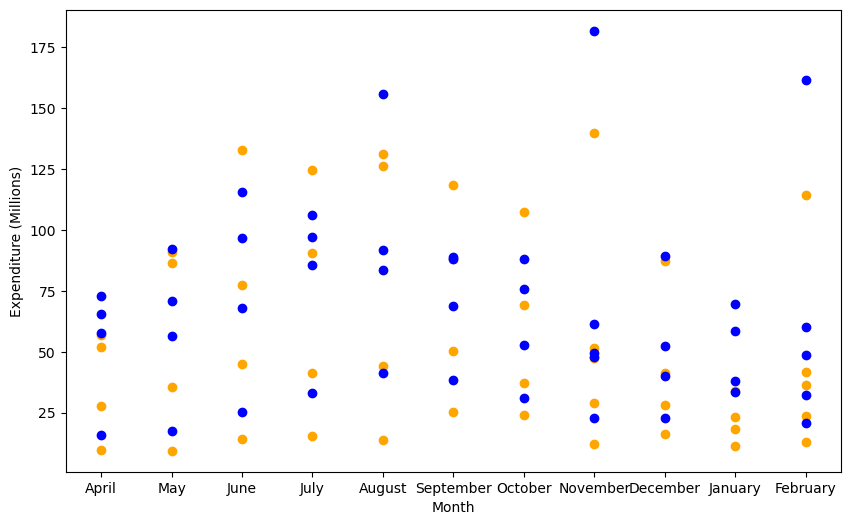

In [64]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(df_3['Month'], df_3['Accommodation'], color= 'orange') 
ax.scatter(df_3['Month'], df_3['DD_Expenditure'], color= 'blue') 
ax.set_xlabel('Month') 
ax.set_ylabel('Expenditure (Millions)') 
plt.show() 

## 2.1 Descriptive statistics Dataset_1

In [65]:
df_1.head()

,Statistic,Month,Hotel,Guest_House/B&B,Friends/relatives,Rented_House,Other,All_Types,Year
0,Number of Overnight Trips by Foreign Visitors,April,181.8,15.4,220.3,26.3,18.1,461.9,2023
1,Number of Overnight Trips by Foreign Visitors,May,234.0,25.6,241.7,31.2,40.8,573.3,2023
2,Number of Overnight Trips by Foreign Visitors,June,286.2,24.8,231.7,34.9,42.3,619.9,2023
3,Number of Overnight Trips by Foreign Visitors,July,276.3,26.7,260.4,41.2,45.6,650.2,2023
4,Number of Overnight Trips by Foreign Visitors,August,297.0,45.7,295.9,36.6,62.3,737.6,2023


In [66]:
num_columns = df_1[['Month','Hotel', 'Guest_House/B&B', 'Friends/relatives', 'Rented_House', 'Other']]

g_month = num_columns.groupby(['Month']).mean()
print(g_month)

            Hotel  Guest_House/B&B  Friends/relatives  Rented_House   Other
Month                                                                      
April      492.60            51.95            1062.55        206.65  250.95
August     297.00            45.70             295.90         36.60   62.30
December   180.50            11.80             203.80         15.70   33.50
January    367.00            36.30            1465.35        126.85  137.35
July       865.80           123.60            1461.05        258.45  438.15
June       891.65           130.25            1085.15        181.80  280.25
May        691.00            98.30             972.55        197.20  565.60
November   513.60            52.95             857.75        130.80  209.85
October    782.75           115.25             986.80        170.55  212.40
September  872.30           212.30            1156.90        181.40  193.00


In [67]:
g_month.head()

,Hotel,Guest_House/B&B,Friends/relatives,Rented_House,Other
Month,,,,,
April,492.6,51.95,1062.55,206.65,250.95
August,297.0,45.70,295.90,36.60,62.30
December,180.5,11.80,203.80,15.70,33.50
January,367.0,36.30,1465.35,126.85,137.35
July,865.8,123.60,1461.05,258.45,438.15


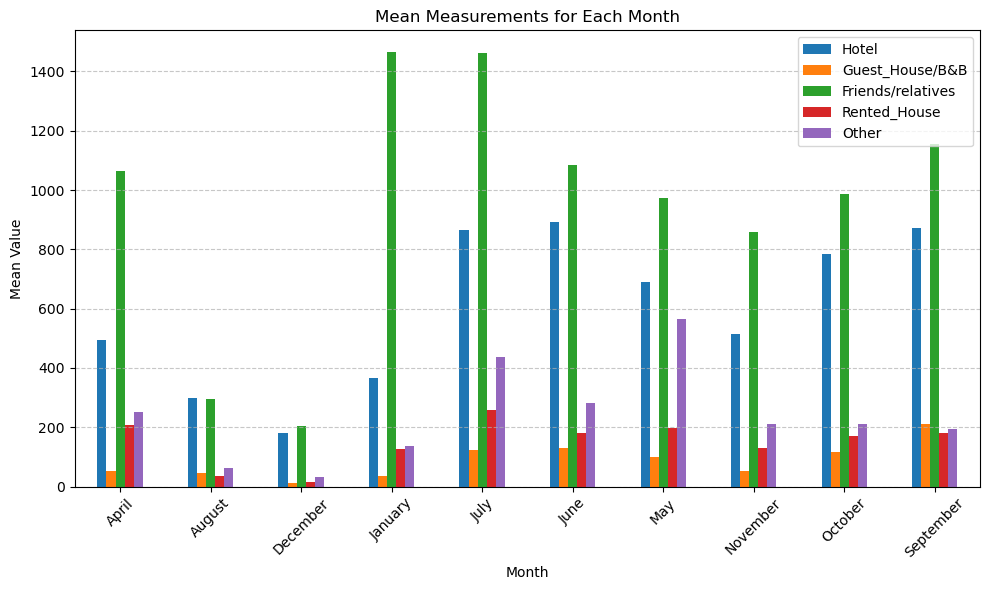

In [68]:
# Plotting the bar plot
g_month.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Measurements for Each Month')
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [69]:
df_1num = df_1[['Month','Hotel', 'Guest_House/B&B', 'Friends/relatives', 'Rented_House', 'Other' ]]

In [70]:

print('Minimum value of', df_1num[['Friends/relatives']].min())

print('Maximum value of', df_1num[['Friends/relatives']].max())

print('Mean of', df_1num[['Friends/relatives']].mean())

print('Median of', df_1num[['Friends/relatives']].median())

print('Standard deviation of', df_1num[['Friends/relatives']].std())

print('Summary Statistics of', df_1num[['Friends/relatives']].describe())

print('Summary Statistics: All')
df_1num.describe()

Minimum value of Friends/relatives    182.4
dtype: float64
Maximum value of Friends/relatives    2684.4
dtype: float64
Mean of Friends/relatives    1033.105556
dtype: float64
Median of Friends/relatives    278.15
dtype: float64
Standard deviation of Friends/relatives    963.074967
dtype: float64
Summary Statistics of        Friends/relatives
count          18.000000
mean         1033.105556
std           963.074967
min           182.400000
25%           223.150000
50%           278.150000
75%          1867.450000
max          2684.400000
Summary Statistics: All


,Hotel,Guest_House/B&B,Friends/relatives,Rented_House,Other
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,635.050000,94.405556,1033.105556,164.427778,259.494444
std,514.732455,103.822209,963.074967,165.095305,315.248004
min,162.800000,11.300000,182.400000,14.300000,17.200000
25%,242.000000,25.000000,223.150000,28.675000,32.825000
50%,291.600000,46.300000,278.150000,38.900000,53.950000
75%,1065.750000,150.600000,1867.450000,324.275000,395.575000
max,1497.100000,377.700000,2684.400000,475.700000,1090.400000


In [71]:
print('Mean Friends/relatives & Hotel by Month:')
print (df_1num.groupby('Month')[['Friends/relatives', 'Hotel']].mean())

print('Summary Statistics of Friends/relatives by Month:')
print(df_1num.groupby('Month')[['Friends/relatives']].describe())

print('Number of missing values of Friends/relatives = ', sum(df_1num["Friends/relatives"].isnull()))

print('Number of non-missing values of Friends/relatives = ', sum(df_1num["Friends/relatives"].notnull()))

print('Counts for different Month:')
df_1.Month.value_counts()

Mean Friends/relatives & Hotel by Month:
           Friends/relatives   Hotel
Month                               
April                1062.55  492.60
August                295.90  297.00
December              203.80  180.50
January              1465.35  367.00
July                 1461.05  865.80
June                 1085.15  891.65
May                   972.55  691.00
November              857.75  513.60
October               986.80  782.75
September            1156.90  872.30
Summary Statistics of Friends/relatives by Month:
          Friends/relatives                                                 \
                      count     mean          std    min      25%      50%   
Month                                                                        
April                   2.0  1062.55  1191.121373  220.3  641.425  1062.55   
August                  1.0   295.90          NaN  295.9  295.900   295.90   
December                1.0   203.80          NaN  203.8  203.800   203.80 

Month
April        2
May          2
June         2
July         2
September    2
October      2
November     2
January      2
August       1
December     1
Name: count, dtype: int64

## 2.1.1 Kurtosis

Kurtosis:
Hotel: -1.187754344668466
Guest_House/B&B: 1.0296917512422024
Friends/relatives: -1.425834354489539
Rented_House: -1.3990488425066998
Other: 0.891919896024874


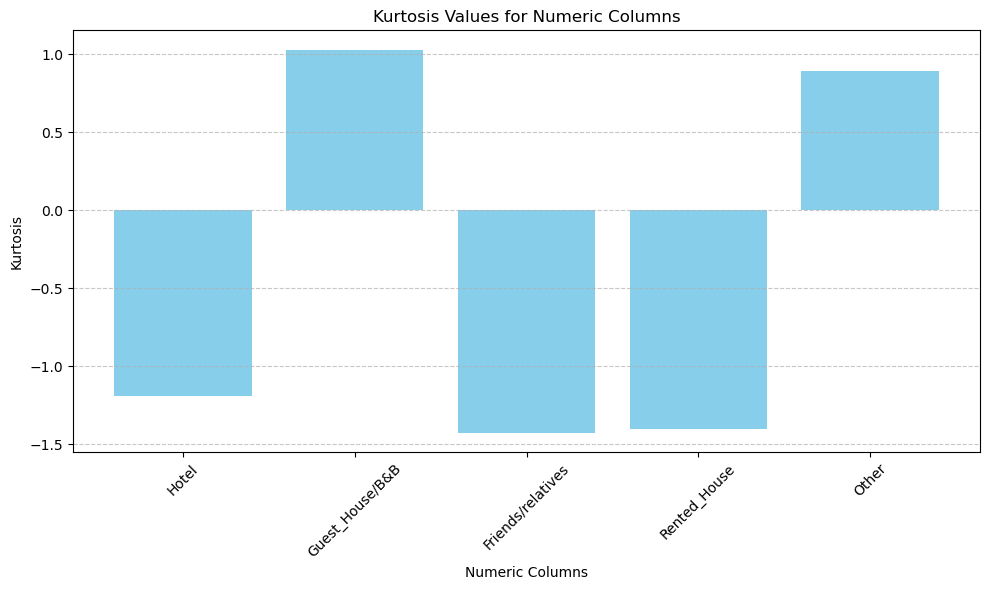

In [72]:
num_columns = ['Hotel', 'Guest_House/B&B', 'Friends/relatives', 'Rented_House', 'Other']

k_values = {col: kurtosis(df_1[col]) for col in num_columns}
print("Kurtosis:")
for col, value in k_values.items():
    print(f"{col}: {value}")


# Extract column names and kurtosis values
columns = list(k_values.keys())
values = list(k_values.values())

# Plotting the kurtosis values
plt.figure(figsize=(10, 6))
plt.bar(columns, values, color='skyblue')
plt.title('Kurtosis Values for Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

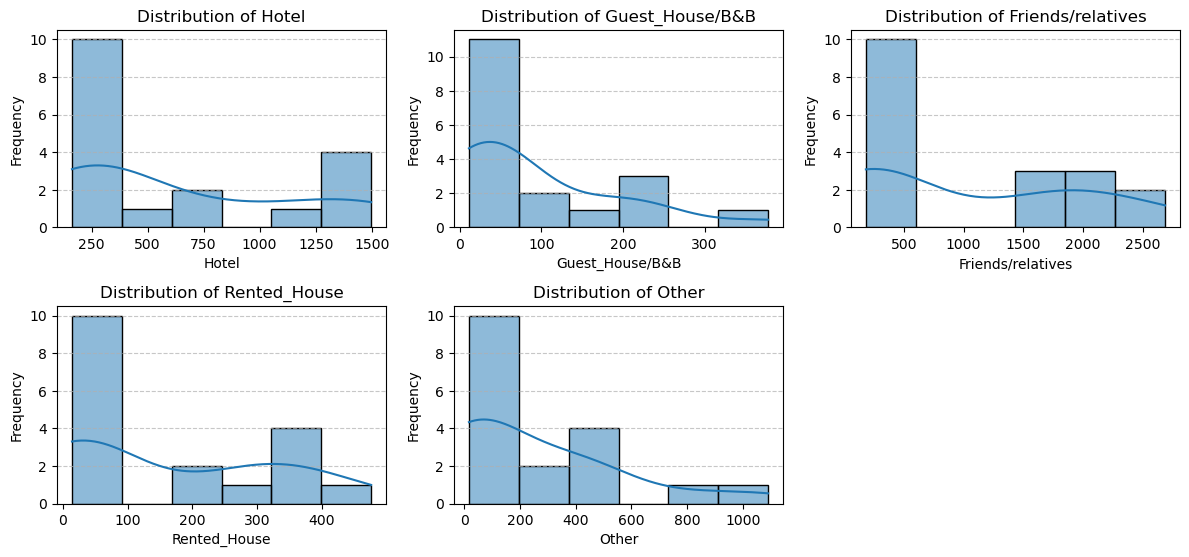

In [73]:
# Plotting distribution plots for each numeric column
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_columns,1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_1, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [74]:
# Calculate range for each numeric column
r_values = {col: df_1[col].max() - df_1[col].min() for col in num_columns}
print("\nRange:")
for col, value in r_values.items():
    print(f"{col}: {value}")


Range:
Hotel: 1334.3
Guest_House/B&B: 366.4
Friends/relatives: 2502.0
Rented_House: 461.4
Other: 1073.2


In [75]:
Q1 = df_1[num_columns].quantile(0.25)
Q3 = df_1[num_columns].quantile(0.75)
IQR = Q3 - Q1
print("The IQR of the dataset is ", IQR )

The IQR of the dataset is  Hotel                 823.75
Guest_House/B&B       125.60
Friends/relatives    1644.30
Rented_House          295.60
Other                 362.75
dtype: float64


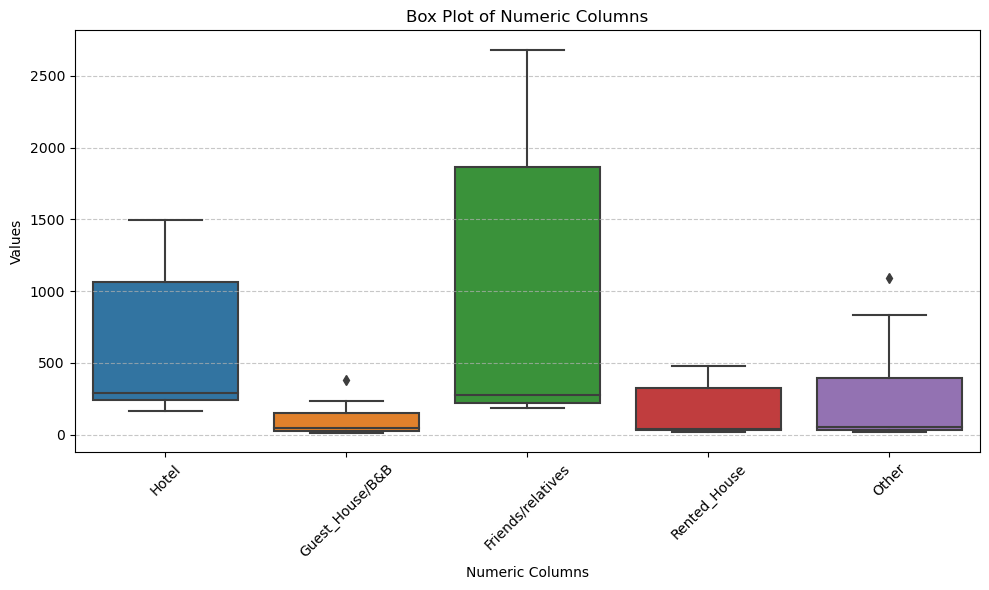

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_1[num_columns])
plt.title('Box Plot of Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

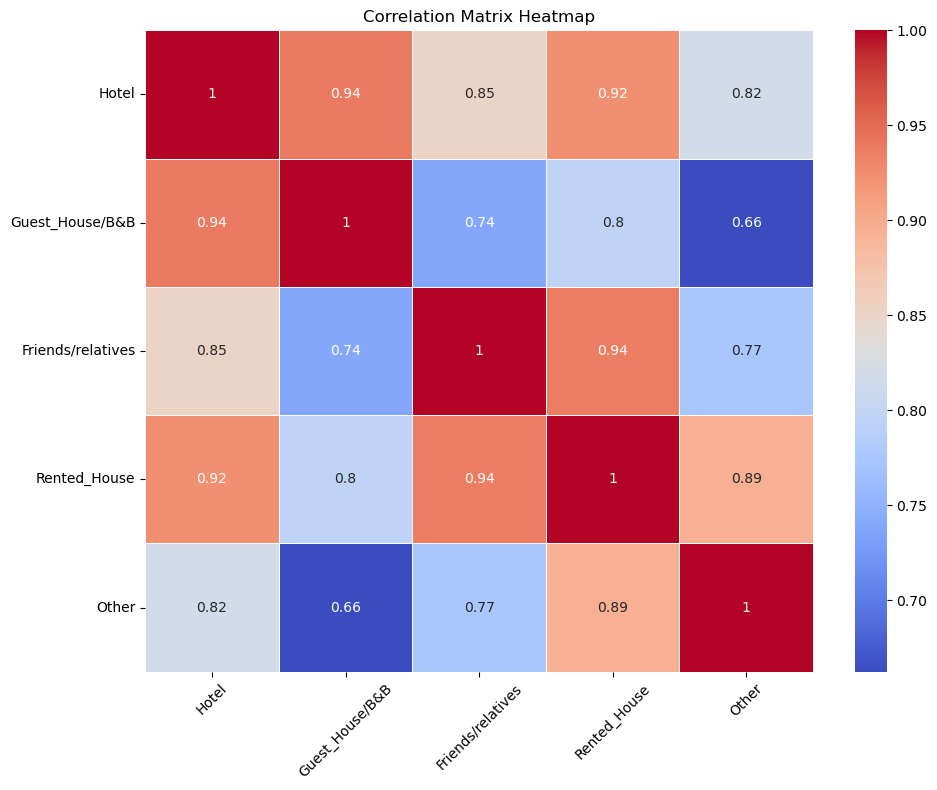

In [77]:
c_matrix = df_1[num_columns].corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 2.1.2 Normal distribution

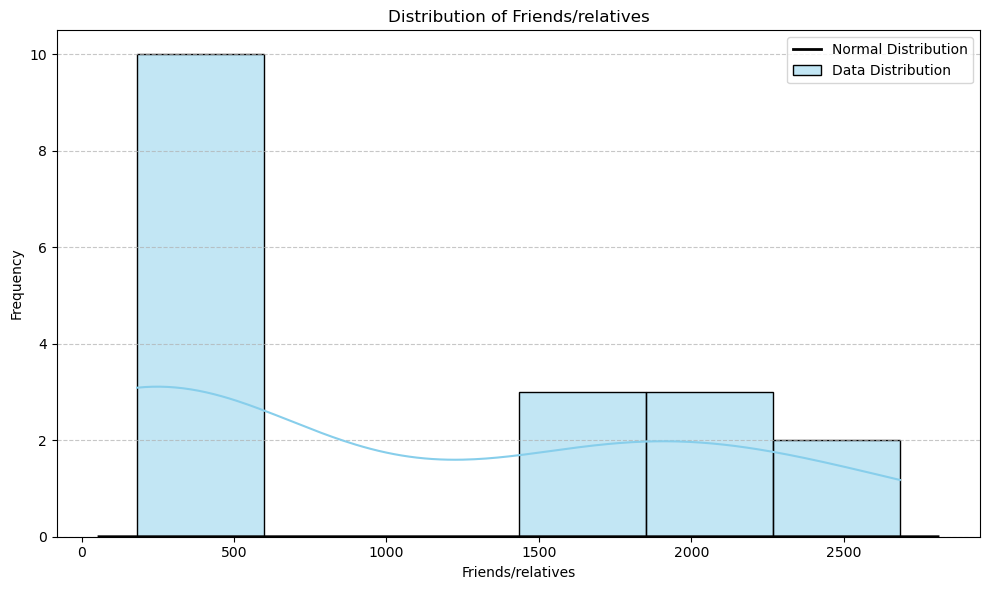

In [78]:
# Selecting a numeric column from the  dataset
col_name = 'Friends/relatives'
data = df_1[col_name]

# Plotting histogram of the selected column
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color='skyblue', label='Data Distribution')

# Fitting normal distribution curve
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x_norm = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x_norm, mu, std)
plt.plot(x_norm, p_norm, 'k', linewidth=2, label='Normal Distribution')

plt.title(f'Distribution of {col_name}')
plt.xlabel(col_name)
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [86]:
data = df_1.drop(columns=['Statistic', 'Month'])
data

,Hotel,Guest_House/B&B,Friends/relatives,Rented_House,Other,All_Types,Year
0,181.8,15.4,220.3,26.3,18.1,461.9,2023
1,234.0,25.6,241.7,31.2,40.8,573.3,2023
2,286.2,24.8,231.7,34.9,42.3,619.9,2023
3,276.3,26.7,260.4,41.2,45.6,650.2,2023
4,297.0,45.7,295.9,36.6,62.3,737.6,2023
5,269.9,46.9,210.1,28.2,26.9,582.1,2023
6,266.0,30.4,218.2,30.1,32.6,577.4,2023
7,208.2,16.5,182.4,17.4,23.0,447.5,2023
8,180.5,11.8,203.8,15.7,33.5,445.2,2023
9,162.8,11.3,246.3,14.3,17.2,451.9,2024


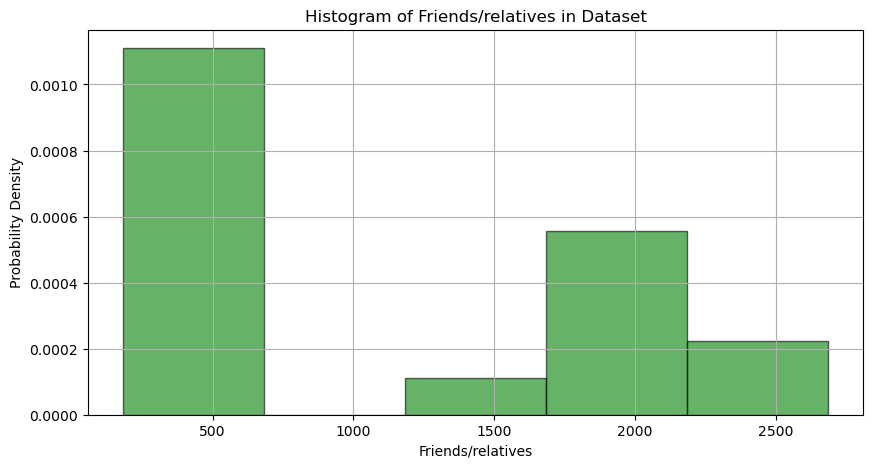

In [89]:
plt.figure(figsize=(10, 5))
plt.hist(data['Friends/relatives'], bins=5, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Histogram of Friends/relatives in Dataset')
plt.xlabel('Friends/relatives')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

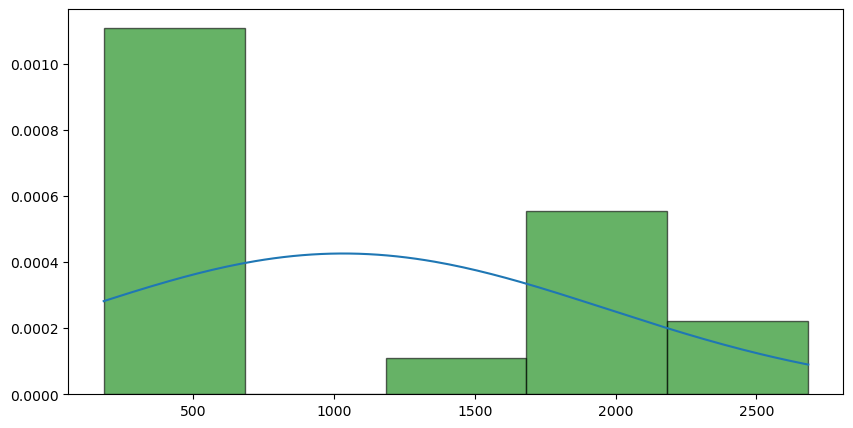

In [88]:
x = np.linspace(min(data['Friends/relatives']), max(data['Friends/relatives']), 150)

# Normal distribution fitting
mu, sigma = stats.norm.fit(data['Friends/relatives'])
pdf_norm = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 5))
plt.hist(data['Friends/relatives'], bins=5, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, pdf_norm,  label='Normal')

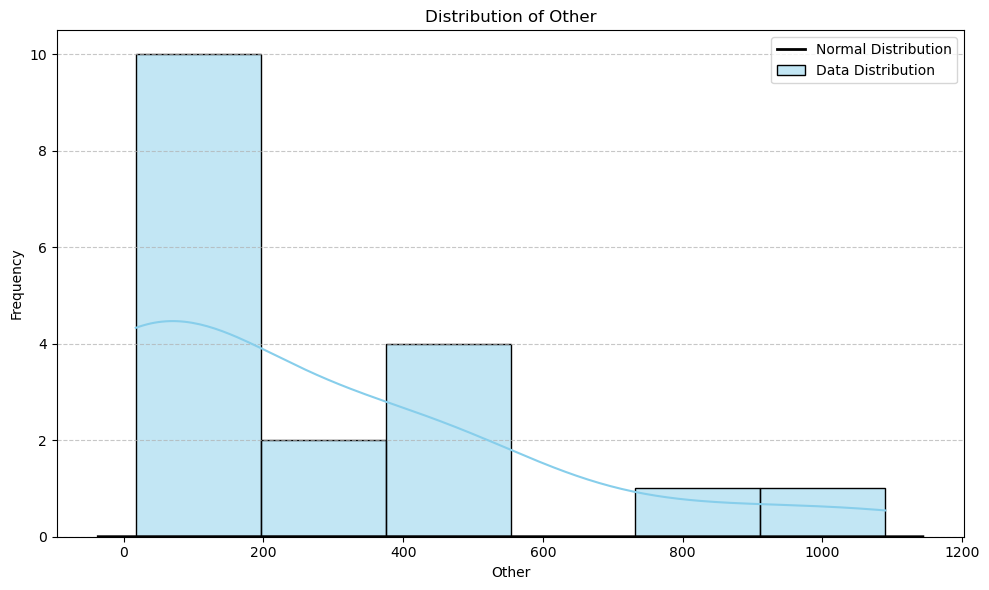

In [114]:
# Selecting a numeric column from the  dataset
col_name = 'Other'
data = df_1[col_name]

# Plotting histogram of the selected column
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color='skyblue', label='Data Distribution')

# Fitting normal distribution curve
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x_norm = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x_norm, mu, std)
plt.plot(x_norm, p_norm, 'k', linewidth=2, label='Normal Distribution')

plt.title(f'Distribution of {col_name}')
plt.xlabel(col_name)
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [115]:
data2 = df_1.drop(columns=['Statistic', 'Month'])
data2

,Hotel,Guest_House/B&B,Friends/relatives,Rented_House,Other,All_Types,Year
0,181.8,15.4,220.3,26.3,18.1,461.9,2023
1,234.0,25.6,241.7,31.2,40.8,573.3,2023
2,286.2,24.8,231.7,34.9,42.3,619.9,2023
3,276.3,26.7,260.4,41.2,45.6,650.2,2023
4,297.0,45.7,295.9,36.6,62.3,737.6,2023
5,269.9,46.9,210.1,28.2,26.9,582.1,2023
6,266.0,30.4,218.2,30.1,32.6,577.4,2023
7,208.2,16.5,182.4,17.4,23.0,447.5,2023
8,180.5,11.8,203.8,15.7,33.5,445.2,2023
9,162.8,11.3,246.3,14.3,17.2,451.9,2024


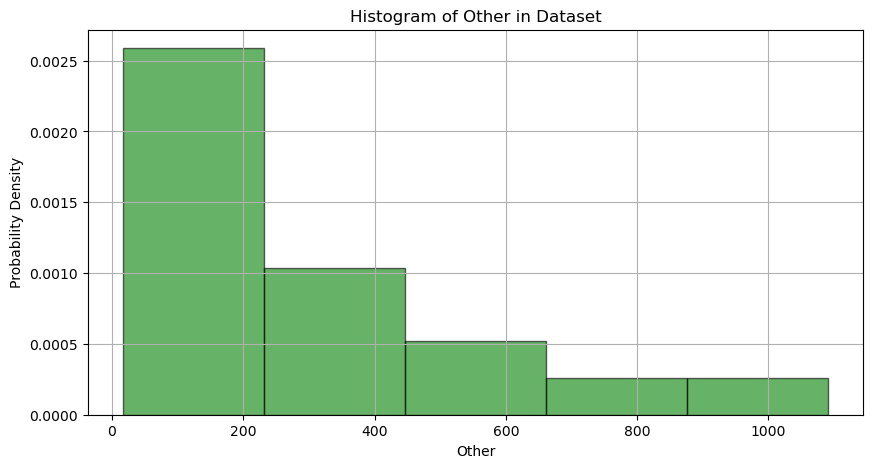

In [121]:
plt.figure(figsize=(10, 5))
plt.hist(data2['Other'], bins=5, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Histogram of Other in Dataset')
plt.xlabel('Other')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

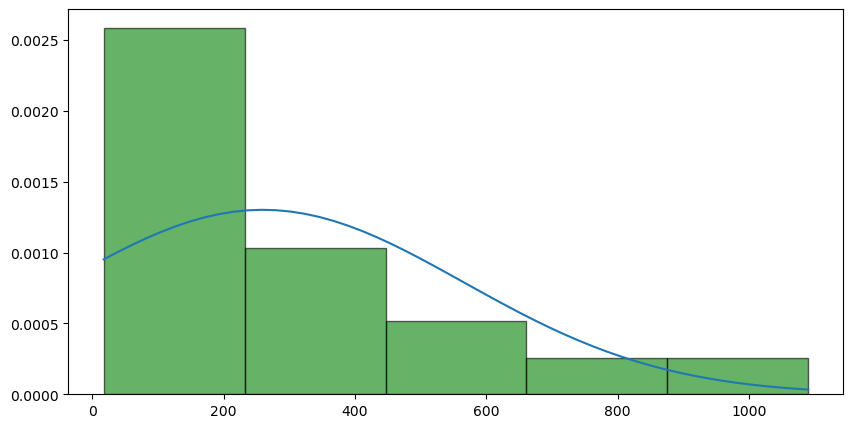

In [122]:
x = np.linspace(min(data2['Other']), max(data2['Other']), 50)

# Normal distribution fitting
mu, sigma = stats.norm.fit(data2['Other'])
pdf_norm = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 5))
plt.hist(data2['Other'], bins=5, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, pdf_norm,  label='Normal')

## 2.1.3 Discrete distributions

In [141]:
acc_Sum = df_1.groupby('Month')[['Hotel','Guest_House/B&B','Friends/relatives','Rented_House','Other']].sum().mean()

num_samples = 50
print(acc_Sum)

Hotel                1143.09
Guest_House/B&B       169.93
Friends/relatives    1859.59
Rented_House          295.97
Other                 467.09
dtype: float64


In [148]:
poisson_distributions = {}

# Apply the Poisson distribution for each species
for month, count in acc_Sum.items():
    rate = count / num_samples  # Average rate of occurrence per sample
    poisson_distribution = poisson(mu=rate)
    poisson_distributions[month] = poisson_distribution

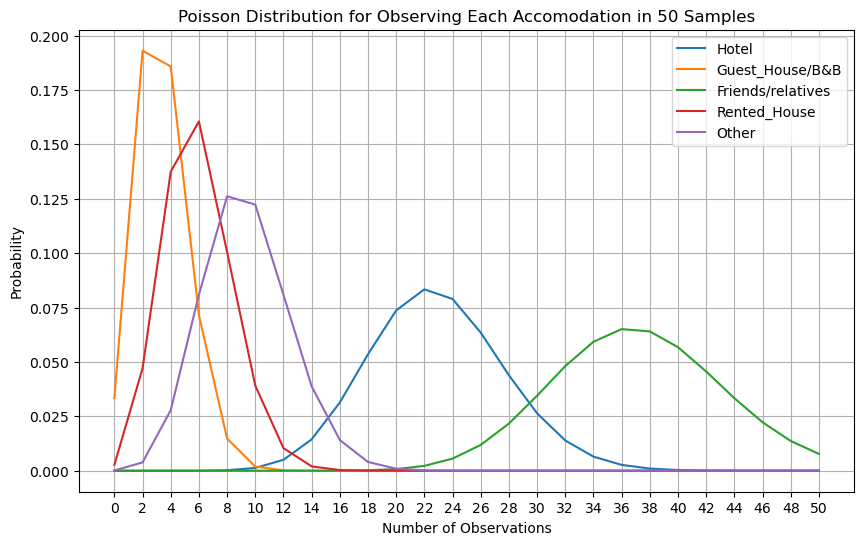

In [152]:
# Possible number of occurrences (0 to num_samples)
k_values = np.arange(0, num_samples + 1, 2)

# Plot the Poisson distributions for each species
plt.figure(figsize=(10, 6))
for month, poisson_distribution in poisson_distributions.items():
    pmf_values = poisson_distribution.pmf(k_values)
    plt.plot(k_values, pmf_values, label=month)

plt.title('Poisson Distribution for Observing Each Accomodation in 50 Samples')
plt.xlabel('Number of Observations')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [153]:
df_2.head()

,Reason_Journey,Year,All types of accommodation,Hotels,Rented_House/Apartment,Friends/relatives,Guess/B&B,Other
1,All reasons for journey,2010,47971,11265,8346,15110,3989,9261
2,All reasons for journey,2011,50323,12552,8494,14785,4169,10324
3,All reasons for journey,2012,47942,14180,6048,13331,4074,10311
4,All reasons for journey,2013,50985,14272,6935,14336,4451,10992
5,All reasons for journey,2014,54877,14707,7852,16096,5171,11051


In [ ]:
#df_2 = df_2.drop(["Statistic","UNIT","Year"],  axis=1)

In [ ]:
df_2.head()

In [ ]:
# Create a dictionary to map old column names to new column names
r_ColummName = {
    'Reason for Journey': 'Journey_Reason',
    'All types of accommodation': 'All_Types',
    'Rented house/apartment': 'Rented_House/apartment',
    'Guest house/bed &breakfast': 'GuessHouse/B&B'
    # Add more mappings for other columns if needed
}

# Rename all columns using the dictionary
df_2.rename(columns=r_ColummName, inplace=True)
df_2.head()

In [ ]:
# Grouping by 'species' column and calculating the mean of each numeric column for each species
g_df_2 = df_2.groupby('Reason_Journey').median()

print("\nMean measurements for each species:")
g_df_2

In [ ]:
# Plotting the bar plot
g_df_2.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Measurements for Each Species')
plt.xlabel('Species')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
print('Minimum value of', df_2[['All_Types']].min())

print('Maximum value of', df_2[['All_Types']].max())

print('Mean of', df_2[['All_Types']].mean())

print('Median of', df_2[['All_Types']].median())

print('Standard deviation of', df_2[['All_Types']].std())

print('Summary Statistics of', df_2[['All_Types']].describe())

print('Summary Statistics: All')
df_2.describe()

In [ ]:
print('Mean Sepal & Petal Length by Species:')
df_2.groupby('Reason_Journey')[['All_Types', 'Hotels']].mean()

print('Summary Statistics of Sepal Length by Species:')
df_2.groupby('Reason_Journey')[['All_Types']].describe()

print('Number of missing values of Sepal Length = ', sum(df_2.All_Types.isnull()))

print('Number of non-missing values of Sepal Length = ', sum(df_2.All_Types.notnull()))

print('Counts for different Species:')
df_2.Reason_Journey.value_counts()

In [ ]:
# Calculate kurtosis for each numeric column
# Selecting numeric columns
numeric_columns = ['All_Types', 'Hotels', 'Rented_House/Apartment', 'Friends/relatives', 'Guess/B&B', 'Other']

kurtosis_values = {col: kurtosis(df_2[col]) for col in numeric_columns}
print("Kurtosis:")
for col, value in kurtosis_values.items():
    print(f"{col}: {value}")


# Extract column names and kurtosis values
columns = list(kurtosis_values.keys())
values = list(kurtosis_values.values())

# Plotting the kurtosis values
plt.figure(figsize=(10, 6))
plt.bar(columns, values, color='skyblue')
plt.title('Kurtosis Values for Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Plotting distribution plots for each numeric column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns,1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_2, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate range for each numeric column
range_values = {col: df_2[col].max() - df_2[col].min() for col in numeric_columns}
print("\nRange:")
for col, value in range_values.items():
    print(f"{col}: {value}")

In [ ]:
# Calculate interquartile range (IQR) for each numeric column
Q1 = df_2[numeric_columns].quantile(0.25)
Q3 = df_2[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
print("The IQR of the iris dataset is ", IQR )

In [ ]:
# Plotting box plots for each numeric column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2[numeric_columns])
plt.title('Box Plot of Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_2[numeric_columns].corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Selecting a numeric column from the Iris dataset
column_name = 'All_Types'
data = df_2[column_name]

# Plotting histogram of the selected column
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color='skyblue', label='Data Distribution')

# Fitting normal distribution curve
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x_norm = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x_norm, mu, std)
plt.plot(x_norm, p_norm, 'k', linewidth=2, label='Normal Distribution')

plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_2.head()

In [ ]:
# Drop the 'species' column from the dataframe
data = df_2.drop(columns=['Reason_Journey', 'All_Types'])
data.head()

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(data['Hotels'], bins=5, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Histogram of Sepal Length in Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

In [ ]:
# Generate x values for plotting PDFs
x = np.linspace(min(data['Hotels']), max(data['Hotels']), 150)

# Normal distribution fitting
mu, sigma = stats.norm.fit(data['Hotels'])
pdf_norm = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 5))
plt.hist(data['Hotels'], bins=5, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, pdf_norm,  label='Normal')

In [ ]:
df_2['Reason_Journey'].unique()

In [ ]:
reason_analyze = 'Business'
reason_df = df_2[df_2['Reason_Journey'] == reason_analyze]
reason_df


In [ ]:
reason_count = len(reason_df)
print(reason_count)
num_samples = 10

In [ ]:
#species_to_analyze = 'Hotels'
#species_df = df_2[df_2['Hotels'] == species_to_analyze]

# Calculate the number of occurrences of the chosen species
#species_count = len(species_df)
#print(species_count)
# Number of samples (trials)
#num_samples = 10

In [ ]:
# Calculate the probability of observing the species in a single sample
prob_reason = reason_count / len(df_2)

# Initialize the binomial distribution
binom_distribution = binom(num_samples, prob_reason)


In [ ]:
# Possible number of occurrences (0 to num_samples)
k_values = np.arange(num_samples + 1)

# Calculate the PMF for the binomial distribution
binom_pmf_values = binom_distribution.pmf(k_values)

# Plot the binomial distribution
plt.figure(figsize=(10, 6))
plt.plot(k_values, binom_pmf_values, marker='o', linestyle='-')
plt.title(f'Binomial Distribution for {reason_analyze} in 10 Samples')
plt.xlabel('Number of Observations')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
df_2.head()

In [ ]:
 reason_count = df_2['Reason_Journey'].value_counts()
reason_count

In [ ]:
num_samples = 10
poisson_distributions = {}

for reason, count in reason_count.items():
    rate = count / num_samples  # Average rate of occurrence per sample
    poisson_distribution = poisson(mu=rate)
    poisson_distributions[reason] = poisson_distribution
    
# Possible number of occurrences (0 to num_samples)
k_values = np.arange(num_samples + 1)

In [ ]:
k_values

In [ ]:
# Plot the Poisson distributions for each type of journey
plt.figure(figsize=(10, 6))
for reason, poisson_distribution in poisson_distributions.items():
    pmf_values = poisson_distribution.pmf(k_values)
    plt.plot(k_values, pmf_values, label=reason)

plt.title('Poisson Distribution for Observing Each Species in 10 Samples')
plt.xlabel('Number of Observations')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.legend()
plt.grid(True)

plt.xlim(0, num_samples)  # Ajustar límites del eje x
plt.ylim(0, 0.4)  # Ajustar límites del eje y
plt.show()

In [ ]:
acc2_Sum = df_2.groupby('Reason_Journey')[['Hotels','Rented_House/Apartment','Friends/relatives','Guess/B&B','Other']].sum().mean()

 
#print (df_1num.groupby('Month')[['Friends/relatives', 'Hotel']].mean())
    
print(acc2_Sum)

num_samples = 25


In [ ]:
poisson_distributions = {}

# Apply the Poisson distribution for each species
for reason, count in acc_Sum.items():
    rate = count / num_samples  # Average rate of occurrence per sample
    poisson_distribution = poisson(mu=rate)
    poisson_distributions[reason] = poisson_distribution
# Possible number of occurrences (0 to num_samples)
k_values = np.arange(num_samples + 1)

In [ ]:
# Plot the Poisson distributions for each species
plt.figure(figsize=(10, 6))
for reason, poisson_distribution in poisson_distributions.items():
    pmf_values = poisson_distribution.pmf(k_values)
    plt.plot(k_values, pmf_values, label=reason)

plt.title('Poisson Distribution for Observing Each Reason of Journey in 25 Samples')
plt.xlabel('Number of Observations')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

##  3 .1 ML

In [ ]:
df_2.head()

In [ ]:
df_2 =df_2.drop('All_Types', axis=1)

In [ ]:
df_2.drop(df_2[df_2['Reason_Journey'] == "All reasons for journey"].index ,inplace=True)
#dummie_datos= pd.get_dummies(datos.drop(['Columna', 'columna2', axis=1]))

In [ ]:
dm_data= pd.get_dummies(df_2['Reason_Journey'])
dm_data.head()

In [ ]:
df_2final = pd.concat([dm_data, df_2], axis=1)
df_2final = df_2final.drop('Reason_Journey', axis=1)
df_2final.head()

In [ ]:
df_2final.rename(columns={'Business' :'label'}, inplace = True)

## Smothe

In [ ]:
df_2final.head()

In [ ]:

ax = sns.countplot(x='label', data=df_2final)

In [ ]:
df_2final.label.value_counts()

In [ ]:
#dividiendo los datos en características y target
X = df_2final.drop('label', axis = 1)
y = df_2final['label']

In [ ]:
smt = SMOTE(random_state=32)
X, y = smt.fit_resample(X, y)

In [ ]:
df_2final = pd.concat([X, y], axis=1)

In [ ]:
ax = sns.countplot(x='label', data=df_2final)

## Decision Tree algorithmm

In [ ]:
# Crear un DataFrame con los datos

df_2= pd.read_csv("Acc_RJ.csv", usecols=["Reason for Journey", "Year","Hotels", 
                                       "Rented house/apartment", "Guest house/bed &breakfast",
                                       "Friends/relatives", "Other" ])

In [ ]:
r_ColName = {
    'Reason for Journey': 'Reason_Journey',
    'Rented house/apartment': 'Rented_House/Apartment',
    'Guest house/bed &breakfast' :'Guess/B&B'
}
df_2.rename(columns= r_ColName, inplace= True)

In [ ]:
df_2.head()

In [ ]:
df_2.isnull().sum()

In [ ]:
df_2.drop(df_2[df_2['Reason_Journey'] == "All reasons for journey"].index ,inplace=True)

In [ ]:
df_2.describe()

In [ ]:
df_2.describe(include = "object")

In [ ]:
X = df_2[['Reason_Journey', 'Year']]
y = df_2[['Hotels', 'Rented_House/Apartment', 'Friends/relatives', 'Guess/B&B', 'Other' ]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
col_trans = ColumnTransformer(
    [('encoder', OneHotEncoder(handle_unknown='ignore'), [0])], remainder='passthrough')
X_train_e = col_trans.fit_transform(X_train)
X_test_e = col_trans.transform(X_test)

In [ ]:
models = {}
for i, column in enumerate(y_train.columns):
    clf = RandomForestRegressor(random_state=42)
    clf.fit(X_train_e, y_train[column])
    models[column] = clf

In [ ]:
models

In [ ]:
y_pred = pd.DataFrame(columns=y_test.columns)
for column in y_test.columns:
    y_pred[column] = models[column].predict(X_test_e)

In [ ]:
accuracies = {}
for column in y_test.columns:
    accuracy = r2_score(y_test[column], y_pred[column])
    accuracies[column] = accuracy

In [ ]:
for column, accuracy in accuracies.items():
    print(f"Accuricy for:  {column}: {accuracy}")

In [ ]:
# New entry prediction
newdata = pd.DataFrame({'Reason_Journey': ['Hotels'], 'Year': [2024]})

# Codificar el nuevo dato
newdata_e = col_trans.transform(newdata)

In [ ]:
prediction = {}
for column in y.columns:
    prediction[column] = models[column].predict(newdata_e)

In [ ]:
print("Prediction for a new entry:")
for column, Value in prediction.items():
    print(f"{column}: {Value[0]}")

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_e,y_train)

In [ ]:
print(clf.feature_importances_)

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=[ 'Hotels', 'Rented_House/Apartment', 'Friends/relatives',
                                                        'Guess/B&B','Other'] ).sort_values(ascending=False)
feature_imp

In [ ]:
f_importance = {}
for column in y.columns:
    f_importance[column] = models[column].feature_importances_


print("Feature Importances:")
for column, importances in f_importance.items():
    print(f"Accomodation: {column}")
    for i, feature in enumerate(col_trans.get_feature_names_out()):
        print(f"{feature}: {importances[i]}")
    print()

In [ ]:
feature = col_trans.get_feature_names_out()
color_scheme = plt.cm.viridis
# Crear un gráfico de barras para cada etiqueta de salida
for column , importances in f_importance.items():
    colors = color_scheme(importances / max(importances))
    
    plt.figure(figsize=(9, 5))
    plt.bar(feature, importances, color=colors)
    plt.title(f'Feature Importance {column}')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.show()